In [8]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


In [2]:
df = yf.download(tickers='GBPUSD=X', period='730d', interval='60m')


[*********************100%***********************]  1 of 1 completed


In [4]:
len(df)

17323

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-07 10:00:00,1.272864,1.273496,1.271989,1.272087,1.272087,0
2023-08-07 11:00:00,1.272232,1.272750,1.271763,1.272540,1.272540,0
2023-08-07 12:00:00,1.273107,1.274454,1.272929,1.274454,1.274454,0
2023-08-07 13:00:00,1.274372,1.277253,1.274113,1.277253,1.277253,0
2023-08-07 14:00:00,1.277531,1.277955,1.277270,1.277465,1.277465,0


In [9]:
columns_to_normalize = df.columns

        # Create the MinMaxScaler and fit it to the data to get the min and max values
scaler = MinMaxScaler()
scaler.fit(df[columns_to_normalize])

# Transform the data using the computed min and max values
normalized_data = scaler.transform(df[columns_to_normalize])

# Create a new DataFrame with the normalized columns and a _norm suffix
normalized_columns = [col + '_norm' for col in columns_to_normalize]
normalized_df = pd.DataFrame(normalized_data, columns=normalized_columns)

In [15]:
df2 = pd.concat([df, normalized_df], axis=0)

In [18]:
for column in normalized_df.columns:
    df[column] = normalized_df[column]
    

In [19]:
df

,Open,High,Low,Close,Adj Close,Volume,Open_norm,High_norm,Low_norm,Close_norm,Adj Close_norm,Volume_norm
Datetime,,,,,,,,,,,,
2020-10-20 00:00:00,1.294783,1.295102,1.294448,1.294783,1.294783,0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-20 01:00:00,1.294700,1.295236,1.294348,1.295119,1.295119,0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-20 02:00:00,1.294951,1.295824,1.293711,1.294046,1.294046,0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-20 03:00:00,1.293795,1.294666,1.293243,1.294415,1.294415,0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-20 04:00:00,1.294532,1.295186,1.294130,1.295186,1.295186,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-07 10:00:00,1.272864,1.273496,1.271989,1.272087,1.272087,0,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-07 11:00:00,1.272232,1.272750,1.271763,1.272540,1.272540,0,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-07 12:00:00,1.273107,1.274454,1.272929,1.274454,1.274454,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# # Calculate the 5-minute and 8-minute moving averages
# df['1_d_ma'] = df['Close'].rolling('1d').mean()
# df['3_d_ma'] = df['Close'].rolling('3d').mean()
# Calculate the 5-minute and 8-minute moving averages
df['1_day_ma'] = df['Close'].rolling('1D').mean()
df['3_day_ma'] = df['Close'].rolling('3D').mean()
df['7_day_ma'] = df['Close'].rolling('7D').mean()
# data['1_week_ma'] = data['Close'].rolling('1W').mean()

In [7]:
def calculate_rsi(data, window=14):
    close_prices = data['Close']
    delta = close_prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df)

In [11]:
df['RSI'] = df['RSI'].fillna(0)

In [13]:
columns_to_normalize = df.columns

# Min-Max scaling relative to itself
df[columns_to_normalize] = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max() - df[columns_to_normalize].min())

# Assuming you have an RSI column named 'RSI'
# Min-Max scaling relative to itself
# df['RSI'] = (df['RSI'] - df['RSI'].min()) / (df['RSI'].max() - df['RSI'].min())

In [17]:
df

,Open,High,Low,Close,Adj Close,Volume,1_day_ma,3_day_ma,7_day_ma,RSI
Datetime,,,,,,,,,,
2020-10-06 00:00:00,0.674864,0.659741,0.675883,0.673953,0.673953,NaN,0.665863,0.655855,0.644831,0.000000
2020-10-06 01:00:00,0.676264,0.660337,0.677062,0.674128,0.674128,NaN,0.665955,0.655951,0.644931,0.000000
2020-10-06 02:00:00,0.676352,0.660246,0.675796,0.672377,0.672377,NaN,0.665371,0.655345,0.644295,0.000000
2020-10-06 03:00:00,0.673508,0.658367,0.675403,0.673428,0.673428,NaN,0.665355,0.655329,0.644278,0.000000
2020-10-06 04:00:00,0.674252,0.661667,0.675665,0.673078,0.673078,NaN,0.665272,0.655243,0.644188,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-07-21 18:00:00,0.641089,0.623813,0.642731,0.639865,0.639865,NaN,0.631690,0.635815,0.643315,0.441254
2023-07-21 19:00:00,0.641261,0.625160,0.643587,0.639951,0.639951,NaN,0.631679,0.635073,0.642700,0.429423
2023-07-21 20:00:00,0.641603,0.623408,0.641405,0.639565,0.639565,NaN,0.631575,0.634346,0.642107,0.426008


In [19]:
# Calculate the 5-minute and 8-minute moving averages
df['1_day_ma'] = df['Close'].rolling('1D').mean()
df['3_day_ma'] = df['Close'].rolling('3D').mean()
df['7_day_ma'] = df['Close'].rolling('7D').mean()
# data['1_week_ma'] = data['Close'].rolling('1W').mean()


In [19]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '1_day_ma',
       '3_day_ma', '7_day_ma', 'RSI'],
      dtype='object')

In [21]:
save_df = df[['Open', 'High', 'Low', 'Close', '1_day_ma',
       '3_day_ma', '7_day_ma', 'RSI']]
save_df.to_csv('740.csv')

In [24]:
import numpy as np

In [25]:
save_df.iloc[0][save_df.columns].values.astype(np.float32)

array([0.6748636 , 0.65974134, 0.67588323, 0.67395324, 0.6658626 ,
       0.65585506, 0.6448309 , 0.        ], dtype=float32)

In [27]:
import pandas as pd

In [41]:
save_df.to_csv('740.csv', index=False)

In [38]:
df2 = pd.read_csv('test.csv')

In [39]:
df2.columns

Index(['Open', 'High', 'Low', 'Close', '1_day_ma', '3_day_ma', '7_day_ma',
       'RSI'],
      dtype='object')

In [40]:
df2.iloc[0][df2.columns].values.astype(np.float32)

array([0.6748636 , 0.65974134, 0.67588323, 0.67395324, 0.6658626 ,
       0.65585506, 0.6448309 , 0.        ], dtype=float32)

In [6]:
import pickle
import matplotlib.pyplot as plt

In [7]:
with open('rewards.pkl', 'rb') as f:
    rew = pickle.load(f)

In [8]:
with open('portfolio.pkl', 'rb') as f:
    port = pickle.load(f)

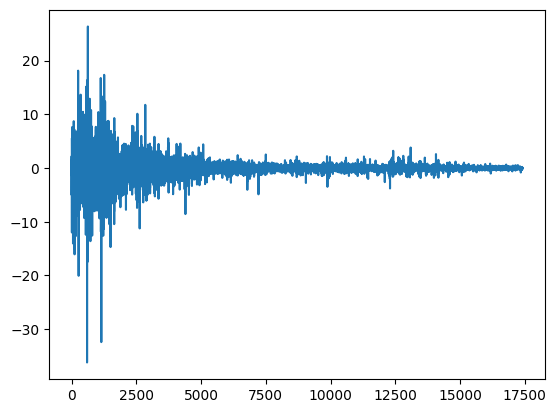

In [16]:
plt.plot(rew)

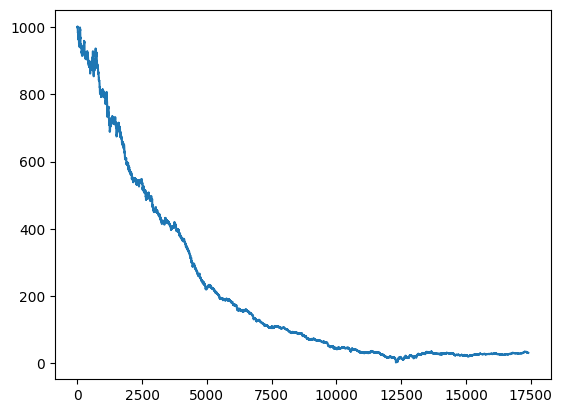

In [17]:
plt.plot(port)

In [28]:
df['Close'][:15]

Datetime
2023-05-01 00:00:00+01:00    1.255982
2023-05-01 00:05:00+01:00    1.256029
2023-05-01 00:10:00+01:00    1.255966
2023-05-01 00:15:00+01:00    1.256155
2023-05-01 00:20:00+01:00    1.256250
2023-05-01 00:25:00+01:00    1.256345
2023-05-01 00:30:00+01:00    1.256360
2023-05-01 00:35:00+01:00    1.256108
2023-05-01 00:40:00+01:00    1.255887
2023-05-01 00:45:00+01:00    1.255824
2023-05-01 00:50:00+01:00    1.255840
2023-05-01 00:55:00+01:00    1.255934
2023-05-01 01:00:00+01:00    1.256171
2023-05-01 01:05:00+01:00    1.255934
2023-05-01 01:10:00+01:00    1.255950
Name: Close, dtype: float64

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/740.csv')

In [3]:
df[df['Close'] == 0]

,Open,High,Low,Close,1_day_ma,3_day_ma,7_day_ma,RSI
12196,0.107971,0.0667,0.005389,0.0,0.010761,0.095561,0.13736,0.094274
